# Autoencoder

このnoteではNNでやってます  
CNNでやる場合は[こちら](https://elix-tech.github.io/ja/2016/07/17/autoencoder.html)の記事を参考に  
ノイズを加えたMNIST画像をautoencoderを通して元の画像を再生する

---

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist
(X_train, _), (X_test, _) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train = X_train.reshape((-1, 784)).astype('float')
X_train /= 255.
X_test = X_test.reshape((-1, 784)).astype('float')
X_test /= 255.

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [7]:
#ノイズを加える
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

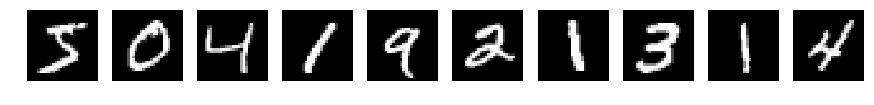

In [19]:
# 元データ
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2)) ####
for i in range(n):
    ax[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

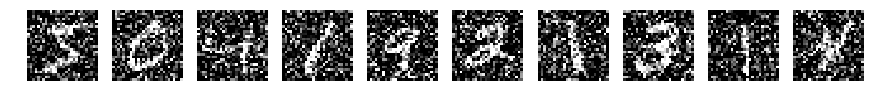

In [20]:
# ノイズを加えたデータ
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

In [22]:
# x_train_noisy → X_train となるように学習
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'mse')


hist = model.fit(x_train_noisy, X_train, epochs=20, batch_size=128,
                 verbose=1, validation_data=(x_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0456 - val_loss: 0.0293
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0269 - val_loss: 0.0249
Epoch 3/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0244 - val_loss: 0.0234
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0232 - val_loss: 0.0223
Epoch 5/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.0222 - val_loss: 0.0215
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0215 - val_loss: 0.0211
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0208 - val_loss: 0.0211
Epoch 8/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0203 - val_loss: 0.0201
Epoch 9/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.0198 - val_loss: 0.0199
E

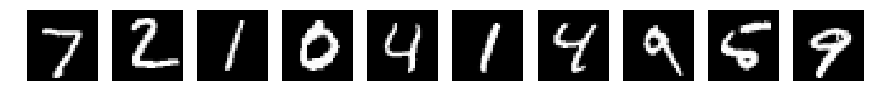

In [23]:
# テスト用データ
n = 10
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

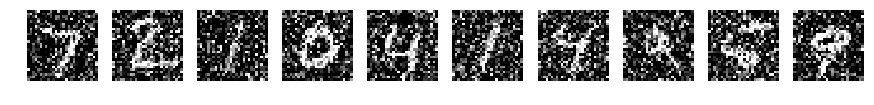

In [24]:
# ノイズを加えたテスト用
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()

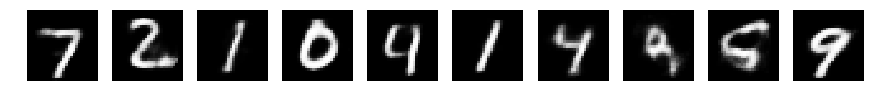

In [25]:
# ノイズを加えたテスト用をautoencoderに入れた結果
_, ax = plt.subplots(ncols=n, figsize=(15, 2))
for i in range(n):
    ax[i].imshow(model.predict(x_test_noisy[i].reshape(1,784)).reshape(28, 28), cmap='gray')
    ax[i].set_axis_off()